<a href="https://colab.research.google.com/github/chiarasanguineti/introduction-to-data-science/blob/main/introduction_to_datascience_uniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importazione delle librerie:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn

# Integrazione

### Piattaforma Amazon


In [ ]:
# caricamento dati
amazon_titles_1 = pd.read_csv("amazon_titles_1.csv")
amazon_titles_2 = pd.read_csv("amazon_titles_2.csv")

In [ ]:
# analisi dei dati
amazon_titles_1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'comedy', 'roma...",['US'],NaN,tt0038650,8.6,469109.0,35.635,8.264
1,tm38206,Whoopee!,MOVIE,Western sheriff Bob Wells is preparing to marr...,1930,NaN,93,"['comedy', 'romance', 'western']",['US'],NaN,tt0021549,6.4,1092.0,1.448,7.000
2,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,61128.0,11.664,7.300
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60459.0,12.582,7.400
4,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1167.0,15.424,7.600


In [ ]:
amazon_titles_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10839 non-null  object 
 1   title                 10839 non-null  object 
 2   type                  10839 non-null  object 
 3   description           10709 non-null  object 
 4   release_year          10839 non-null  int64  
 5   age_certification     3638 non-null   object 
 6   runtime               10839 non-null  int64  
 7   genres                10839 non-null  object 
 8   production_countries  10839 non-null  object 
 9   seasons               1534 non-null   float64
 10  imdb_id               10151 non-null  object 
 11  imdb_score            9751 non-null   float64
 12  imdb_votes            9738 non-null   float64
 13  tmdb_popularity       10274 non-null  float64
 14  tmdb_score            8738 non-null   float64
dtypes: float64(5), int6

In [ ]:
amazon_titles_2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
amazon_titles_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [ ]:
# droppo colonne di amazon_titles_2 tranne date_added e country
amazon_titles_2 = amazon_titles_2.drop(columns=["show_id"], axis=1)
amazon_titles_2 = amazon_titles_2.drop(columns=["type"], axis=1)
amazon_titles_2 = amazon_titles_2.drop(columns=["director"], axis=1)
amazon_titles_2 = amazon_titles_2.drop(columns=["cast"], axis=1)
amazon_titles_2 = amazon_titles_2.drop(columns=["rating"], axis=1)
amazon_titles_2 = amazon_titles_2.drop(columns=["duration"], axis=1)
amazon_titles_2 = amazon_titles_2.drop(columns=["listed_in"], axis=1)
amazon_titles_2 = amazon_titles_2.drop(columns=["description"], axis=1)

In [ ]:
# controllo il dataset
amazon_titles_2.head()

,title,country,date_added,release_year
0,The Grand Seduction,Canada,"March 30, 2021",2014
1,Take Care Good Night,India,"March 30, 2021",2018
2,Secrets of Deception,United States,"March 30, 2021",2017
3,Pink: Staying True,United States,"March 30, 2021",2014
4,Monster Maker,United Kingdom,"March 30, 2021",1989


In [ ]:
amazon_titles_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         9668 non-null   object
 1   country       672 non-null    object
 2   date_added    155 non-null    object
 3   release_year  9668 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 302.2+ KB


In [ ]:
# join
amazon_titles_combinata = pd.merge(amazon_titles_1, amazon_titles_2, how='inner', on = ['title', 'release_year'])

In [ ]:
# analizzo tabella
amazon_titles_combinata.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added
0,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60459.0,12.582,7.400,NaN,NaN
1,tm88469,The Bishop's Wife,MOVIE,"An Episcopal Bishop, Henry Brougham, has been ...",1948,NaN,105,"['comedy', 'drama', 'fantasy', 'romance']",['US'],NaN,tt0039190,7.6,19233.0,12.131,7.100,NaN,NaN
2,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,NaN,115,"['history', 'drama', 'romance']",['US'],NaN,tt0033836,7.9,12405.0,8.585,7.559,NaN,NaN
3,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,NaN,95,"['drama', 'comedy', 'romance']",['US'],NaN,tt0028010,8.0,24918.0,11.167,7.560,NaN,NaN
4,tm120863,Dodsworth,MOVIE,A retired auto manufacturer and his wife take ...,1936,NaN,101,"['drama', 'romance']",['US'],NaN,tt0027532,7.8,9599.0,6.756,7.200,NaN,NaN


In [ ]:
amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2924 non-null   object 
 1   title                 2924 non-null   object 
 2   type                  2924 non-null   object 
 3   description           2895 non-null   object 
 4   release_year          2924 non-null   int64  
 5   age_certification     911 non-null    object 
 6   runtime               2924 non-null   int64  
 7   genres                2924 non-null   object 
 8   production_countries  2924 non-null   object 
 9   seasons               322 non-null    float64
 10  imdb_id               2716 non-null   object 
 11  imdb_score            2624 non-null   float64
 12  imdb_votes            2619 non-null   float64
 13  tmdb_popularity       2763 non-null   float64
 14  tmdb_score            2311 non-null   float64
 15  country              

In [ ]:
# dimensioni tabella
print(amazon_titles_combinata.shape)

(2924, 17)


In [ ]:
amazon_titles_combinata.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added
0,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60459.0,12.582,7.400,NaN,NaN
1,tm88469,The Bishop's Wife,MOVIE,"An Episcopal Bishop, Henry Brougham, has been ...",1948,NaN,105,"['comedy', 'drama', 'fantasy', 'romance']",['US'],NaN,tt0039190,7.6,19233.0,12.131,7.100,NaN,NaN
2,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,NaN,115,"['history', 'drama', 'romance']",['US'],NaN,tt0033836,7.9,12405.0,8.585,7.559,NaN,NaN
3,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,NaN,95,"['drama', 'comedy', 'romance']",['US'],NaN,tt0028010,8.0,24918.0,11.167,7.560,NaN,NaN
4,tm120863,Dodsworth,MOVIE,A retired auto manufacturer and his wife take ...,1936,NaN,101,"['drama', 'romance']",['US'],NaN,tt0027532,7.8,9599.0,6.756,7.200,NaN,NaN


In [ ]:
amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2924 non-null   object 
 1   title                 2924 non-null   object 
 2   type                  2924 non-null   object 
 3   description           2895 non-null   object 
 4   release_year          2924 non-null   int64  
 5   age_certification     911 non-null    object 
 6   runtime               2924 non-null   int64  
 7   genres                2924 non-null   object 
 8   production_countries  2924 non-null   object 
 9   seasons               322 non-null    float64
 10  imdb_id               2716 non-null   object 
 11  imdb_score            2624 non-null   float64
 12  imdb_votes            2619 non-null   float64
 13  tmdb_popularity       2763 non-null   float64
 14  tmdb_score            2311 non-null   float64
 15  country              

In [ ]:
# valori null
amazon_titles_combinata.isnull().sum()

id                         0
title                      0
type                       0
description               29
release_year               0
age_certification       2013
runtime                    0
genres                     0
production_countries       0
seasons                 2602
imdb_id                  208
imdb_score               300
imdb_votes               305
tmdb_popularity          161
tmdb_score               613
country                 2573
date_added              2916
dtype: int64

In [ ]:
# lavoro su age_certification
# stampo valori unici
print(amazon_titles_combinata['age_certification'].unique())

# dato che ci sono valori che rappresentano lo stesso dato, li unisco
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('TV-PG', '7+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('PG-13', '14+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('TV-14', '14+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('TV-G', 'all')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('NC-17', '18+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('TV-MA', '18+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('TV-Y7-FV', '7+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('AGES_18_', '18+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('AGES_16_', '16+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('ALL_AGES', 'all')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('NOT_RATE', 'not rated')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('TV-NR', 'not rated')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('UNRATED', 'not rated')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('ALL', 'all')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('TV-Y7', '7+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('TV-Y', 'all')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('PG', '7+')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('G', 'all')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('NR', 'not rated')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('UR', 'not rated')
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].str.replace('R', '18+')

# controllo i campi ottenuti
print(amazon_titles_combinata['age_certification'].unique())

# rimpiazzo i null con not rated
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].fillna('not rated')

#controllo nuovamente i campi ottenuti
print(amazon_titles_combinata['age_certification'].unique())

[nan 'PG-13' 'G' 'PG' 'R' 'TV-G' 'TV-Y' 'TV-PG' 'TV-MA' 'TV-14' 'TV-Y7'
 'NC-17' 'TV-Y7-FV']
[nan '14+' 'all' '7+' '18+']
['not rated' '14+' 'all' '7+' '18+']


In [ ]:
# controllo la tabella
amazon_titles_combinata.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added
0,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,not rated,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60459.0,12.582,7.400,NaN,NaN
1,tm88469,The Bishop's Wife,MOVIE,"An Episcopal Bishop, Henry Brougham, has been ...",1948,not rated,105,"['comedy', 'drama', 'fantasy', 'romance']",['US'],NaN,tt0039190,7.6,19233.0,12.131,7.100,NaN,NaN
2,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,not rated,115,"['history', 'drama', 'romance']",['US'],NaN,tt0033836,7.9,12405.0,8.585,7.559,NaN,NaN
3,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,not rated,95,"['drama', 'comedy', 'romance']",['US'],NaN,tt0028010,8.0,24918.0,11.167,7.560,NaN,NaN
4,tm120863,Dodsworth,MOVIE,A retired auto manufacturer and his wife take ...,1936,not rated,101,"['drama', 'romance']",['US'],NaN,tt0027532,7.8,9599.0,6.756,7.200,NaN,NaN


In [ ]:
# controllo di non avere più valori null in age_certification
amazon_titles_combinata.isnull().sum()

id                         0
title                      0
type                       0
description               29
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                 2602
imdb_id                  208
imdb_score               300
imdb_votes               305
tmdb_popularity          161
tmdb_score               613
country                 2573
date_added              2916
dtype: int64

In [ ]:
# colonna seasons
# agisce selettivamente solo sulle righe relative ai film (dove "type" è "MOVIE")
# e sostituisce i valori nulli nella colonna "seasons" con 0.
index = (amazon_titles_combinata['type'] == 'MOVIE')
amazon_titles_combinata['seasons'][index] = amazon_titles_combinata['seasons'][index].fillna(0)

<ipython-input-20-d487f5cb65eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_titles_combinata['seasons'][index] = amazon_titles_combinata['seasons'][index].fillna(0)


In [ ]:
# controllo
amazon_titles_combinata.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added
0,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,not rated,92,"['drama', 'romance', 'comedy']",['US'],0.0,tt0032599,7.8,60459.0,12.582,7.400,NaN,NaN
1,tm88469,The Bishop's Wife,MOVIE,"An Episcopal Bishop, Henry Brougham, has been ...",1948,not rated,105,"['comedy', 'drama', 'fantasy', 'romance']",['US'],0.0,tt0039190,7.6,19233.0,12.131,7.100,NaN,NaN
2,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,not rated,115,"['history', 'drama', 'romance']",['US'],0.0,tt0033836,7.9,12405.0,8.585,7.559,NaN,NaN
3,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,not rated,95,"['drama', 'comedy', 'romance']",['US'],0.0,tt0028010,8.0,24918.0,11.167,7.560,NaN,NaN
4,tm120863,Dodsworth,MOVIE,A retired auto manufacturer and his wife take ...,1936,not rated,101,"['drama', 'romance']",['US'],0.0,tt0027532,7.8,9599.0,6.756,7.200,NaN,NaN


In [ ]:
amazon_titles_combinata.isnull().sum()

id                         0
title                      0
type                       0
description               29
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  208
imdb_score               300
imdb_votes               305
tmdb_popularity          161
tmdb_score               613
country                 2573
date_added              2916
dtype: int64

In [ ]:
# droppo country
amazon_titles_combinata = amazon_titles_combinata.drop(columns=["country"], axis=1)

In [ ]:
amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2924 non-null   object 
 1   title                 2924 non-null   object 
 2   type                  2924 non-null   object 
 3   description           2895 non-null   object 
 4   release_year          2924 non-null   int64  
 5   age_certification     2924 non-null   object 
 6   runtime               2924 non-null   int64  
 7   genres                2924 non-null   object 
 8   production_countries  2924 non-null   object 
 9   seasons               2924 non-null   float64
 10  imdb_id               2716 non-null   object 
 11  imdb_score            2624 non-null   float64
 12  imdb_votes            2619 non-null   float64
 13  tmdb_popularity       2763 non-null   float64
 14  tmdb_score            2311 non-null   float64
 15  date_added           

In [ ]:
amazon_titles_combinata.isnull().sum()

id                         0
title                      0
type                       0
description               29
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  208
imdb_score               300
imdb_votes               305
tmdb_popularity          161
tmdb_score               613
date_added              2916
dtype: int64

In [ ]:
# imdb_score, lavoro sui valori null
#calcolo media non nulli:
#1) trovo indici nulli e non nulli di imdb_score
index_null = amazon_titles_combinata['imdb_score'].isnull()
index_notnull = amazon_titles_combinata['imdb_score'].notnull()

#2) calcolo media non nulli di imdb_score
average = amazon_titles_combinata['imdb_score'][index_notnull].mean()

#3) sostituisco con loc la media sugli indici nulli
amazon_titles_combinata.loc[index_null,'imdb_score'] = average

#4) stampo il valore della media per visualizzarla
print(average)

5.957545731707317


In [ ]:
amazon_titles_combinata.isnull().sum()

id                         0
title                      0
type                       0
description               29
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  208
imdb_score                 0
imdb_votes               305
tmdb_popularity          161
tmdb_score               613
date_added              2916
dtype: int64

In [ ]:
# imdb_votes
#calcolo media non nulli:
#1) trovo indici nulli e non nulli di imdb_votes
index_null = amazon_titles_combinata['imdb_votes'].isnull()
index_notnull = amazon_titles_combinata['imdb_votes'].notnull()

#2) calcolo media non nulli di imdb_votes
average = amazon_titles_combinata['imdb_votes'][index_notnull].mean()

#3) sostituisco con loc la media sugli indici nulli
amazon_titles_combinata.loc[index_null,'imdb_votes'] = average

#4) stampo il valore della media per visualizzarla
print(average)

4862.5360824742265


In [ ]:
# tmdb_score
#calcolo media non nulli:
#1) trovo indici nulli e non nulli di tmdb_score
index_null = amazon_titles_combinata['tmdb_score'].isnull()
index_notnull = amazon_titles_combinata['tmdb_score'].notnull()

#2) calcolo media non nulli di tmdb_score
average = amazon_titles_combinata['tmdb_score'][index_notnull].mean()

#3) sostituisco con loc la media sugli indici nulli
amazon_titles_combinata.loc[index_null,'tmdb_score'] = average

#4) stampo il valore della media per visualizzarla
print(average)

6.0122271743833835


In [ ]:
#tmdb_popularity
#calcolo media non nulli:
#1) trovo indici nulli e non nulli di tmdb_popularity
index_null = amazon_titles_combinata['tmdb_popularity'].isnull()
index_notnull = amazon_titles_combinata['tmdb_popularity'].notnull()

#2) calcolo media non nulli di tmdb_popularity
average = amazon_titles_combinata['tmdb_popularity'][index_notnull].mean()

#3) sostituisco con loc la media sugli indici nulli
amazon_titles_combinata.loc[index_null,'tmdb_popularity'] = average

#4) stampo il valore della media per visualizzarla
print(average)

5.006315124140428


In [ ]:
# controllo tabella
amazon_titles_combinata.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,date_added
0,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,not rated,92,"['drama', 'romance', 'comedy']",['US'],0.0,tt0032599,7.8,60459.0,12.582,7.400,NaN
1,tm88469,The Bishop's Wife,MOVIE,"An Episcopal Bishop, Henry Brougham, has been ...",1948,not rated,105,"['comedy', 'drama', 'fantasy', 'romance']",['US'],0.0,tt0039190,7.6,19233.0,12.131,7.100,NaN
2,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,not rated,115,"['history', 'drama', 'romance']",['US'],0.0,tt0033836,7.9,12405.0,8.585,7.559,NaN
3,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,not rated,95,"['drama', 'comedy', 'romance']",['US'],0.0,tt0028010,8.0,24918.0,11.167,7.560,NaN
4,tm120863,Dodsworth,MOVIE,A retired auto manufacturer and his wife take ...,1936,not rated,101,"['drama', 'romance']",['US'],0.0,tt0027532,7.8,9599.0,6.756,7.200,NaN


### Piattaforma Disney


Eseguo una procedura analoga a quella fatta per i dataset di Disney

In [ ]:
disney_titles_1 = pd.read_csv("disney_titles_1.csv")
disney_titles_2 = pd.read_csv("disney_titles_2.csv")

In [ ]:
disney_titles_1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['comedy', 'drama', 'family']",['US'],NaN,tt0039628,7.9,51044.0,21.099,7.400
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'comedy', '...",['US'],NaN,tt0041094,6.9,16561.0,19.746,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'romance', 'family']",['US'],NaN,tt0042332,7.3,164852.0,116.704,7.037
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'fantasy', 'drama', 'family']",['US'],NaN,tt0033563,7.2,135446.0,57.295,6.998
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'music', 'family', 'fantasy']",['US'],NaN,tt0032455,7.7,99060.0,42.839,7.378


In [ ]:
disney_titles_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1836 non-null   object 
 1   title                 1836 non-null   object 
 2   type                  1836 non-null   object 
 3   description           1827 non-null   object 
 4   release_year          1836 non-null   int64  
 5   age_certification     1394 non-null   object 
 6   runtime               1836 non-null   int64  
 7   genres                1836 non-null   object 
 8   production_countries  1836 non-null   object 
 9   seasons               534 non-null    float64
 10  imdb_id               1364 non-null   object 
 11  imdb_score            1327 non-null   float64
 12  imdb_votes            1316 non-null   float64
 13  tmdb_popularity       1820 non-null   float64
 14  tmdb_score            1702 non-null   float64
dtypes: float64(5), int64(

In [ ]:
disney_titles_2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
disney_titles_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
# droppo colonne di disney_titles_2 tranne data_added e country
disney_titles_2 = disney_titles_2.drop(columns=["show_id"], axis=1)
disney_titles_2 = disney_titles_2.drop(columns=["type"], axis=1)
disney_titles_2 = disney_titles_2.drop(columns=["director"], axis=1)
disney_titles_2 = disney_titles_2.drop(columns=["cast"], axis=1)
disney_titles_2 = disney_titles_2.drop(columns=["rating"], axis=1)
disney_titles_2 = disney_titles_2.drop(columns=["duration"], axis=1)
disney_titles_2 = disney_titles_2.drop(columns=["listed_in"], axis=1)
disney_titles_2 = disney_titles_2.drop(columns=["description"], axis=1)

In [ ]:
disney_titles_2.head()

,title,country,date_added,release_year
0,Duck the Halls: A Mickey Mouse Christmas Special,NaN,"November 26, 2021",2016
1,Ernest Saves Christmas,NaN,"November 26, 2021",1988
2,Ice Age: A Mammoth Christmas,United States,"November 26, 2021",2011
3,The Queen Family Singalong,NaN,"November 26, 2021",2021
4,The Beatles: Get Back,NaN,"November 25, 2021",2021


In [ ]:
disney_titles_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1450 non-null   object
 1   country       1231 non-null   object
 2   date_added    1447 non-null   object
 3   release_year  1450 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.4+ KB


In [ ]:
disney_titles_2.isnull().sum()

title             0
country         219
date_added        3
release_year      0
dtype: int64

In [ ]:
# join
disney_titles_combinata = pd.merge(disney_titles_1, disney_titles_2, how='inner', on = ['title', 'release_year'])

In [ ]:
disney_titles_combinata.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added
0,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'romance', 'family']",['US'],NaN,tt0042332,7.3,164852.0,116.704,7.037,United States,"November 12, 2019"
1,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['drama', 'family', 'animation']",['US'],NaN,tt0034492,7.3,146753.0,62.168,7.007,United States,"November 12, 2019"
2,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,NaN,96,"['family', 'action']","['US', 'GB']",NaN,tt0043067,6.9,8818.0,10.393,6.600,"United Kingdom, United States","November 12, 2019"
3,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,151532.0,70.919,7.105,United States,"November 12, 2019"
4,tm87968,Early to Bed,MOVIE,"Donald has to get up early, but everything see...",1941,NaN,8,['comedy'],['US'],NaN,NaN,NaN,NaN,6.135,6.800,United States,"November 12, 2019"


In [ ]:
disney_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    918 non-null    object 
 1   title                 918 non-null    object 
 2   type                  918 non-null    object 
 3   description           918 non-null    object 
 4   release_year          918 non-null    int64  
 5   age_certification     722 non-null    object 
 6   runtime               918 non-null    int64  
 7   genres                918 non-null    object 
 8   production_countries  918 non-null    object 
 9   seasons               185 non-null    float64
 10  imdb_id               679 non-null    object 
 11  imdb_score            666 non-null    float64
 12  imdb_votes            665 non-null    float64
 13  tmdb_popularity       916 non-null    float64
 14  tmdb_score            883 non-null    float64
 15  country               8

In [ ]:
disney_titles_combinata.isnull().sum()

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification       196
runtime                   0
genres                    0
production_countries      0
seasons                 733
imdb_id                 239
imdb_score              252
imdb_votes              253
tmdb_popularity           2
tmdb_score               35
country                 110
date_added                1
dtype: int64

In [ ]:
# age_certification
# stampo tutti gli age_certification raggruppati
print(disney_titles_combinata['age_certification'].unique())

# dato che ci sono valori che rappresentano lo stesso dato, li unisco
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('TV-PG', '7+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('PG-13', '14+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('TV-14', '14+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('TV-G', 'all')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('NC-17', '18+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('TV-MA', '18+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('TV-Y7-FV', '7+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('AGES_18_', '18+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('AGES_16_', '16+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('ALL_AGES', 'all')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('NOT_RATE', 'not rated')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('TV-NR', 'not rated')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('UNRATED', 'not rated')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('ALL', 'all')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('TV-Y7', '7+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('TV-Y', 'all')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('PG', '7+')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('G', 'all')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('NR', 'not rated')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('UR', 'not rated')
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].str.replace('R', '18+')

#data la differenza fra "16_" e "16+", innanzitutto mostra le righe non nulle di age_certification che contengono 16
print(disney_titles_combinata['age_certification'].unique())

# rimpiazzo i null con not rated
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].fillna('not rated')
print(disney_titles_combinata['age_certification'].unique())

['G' nan 'TV-G' 'PG' 'TV-PG' 'TV-MA' 'PG-13' 'TV-Y7-FV' 'TV-Y' 'TV-Y7'
 'TV-14']
['all' nan '7+' '18+' '14+']
['all' 'not rated' '7+' '18+' '14+']


In [ ]:
disney_titles_combinata.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,date_added
0,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,all,74,"['fantasy', 'animation', 'romance', 'family']",['US'],NaN,tt0042332,7.3,164852.0,116.704,7.037,United States,"November 12, 2019"
1,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,all,70,"['drama', 'family', 'animation']",['US'],NaN,tt0034492,7.3,146753.0,62.168,7.007,United States,"November 12, 2019"
2,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,not rated,96,"['family', 'action']","['US', 'GB']",NaN,tt0043067,6.9,8818.0,10.393,6.600,"United Kingdom, United States","November 12, 2019"
3,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,all,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,151532.0,70.919,7.105,United States,"November 12, 2019"
4,tm87968,Early to Bed,MOVIE,"Donald has to get up early, but everything see...",1941,not rated,8,['comedy'],['US'],NaN,NaN,NaN,NaN,6.135,6.800,United States,"November 12, 2019"


In [ ]:
# seasons
index = (disney_titles_combinata['type'] == 'MOVIE')
disney_titles_combinata['seasons'][index] = disney_titles_combinata['seasons'][index].fillna(0)

<ipython-input-47-7c1bb61cdae7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_titles_combinata['seasons'][index] = disney_titles_combinata['seasons'][index].fillna(0)


In [ ]:
disney_titles_combinata.isnull().sum()

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 239
imdb_score              252
imdb_votes              253
tmdb_popularity           2
tmdb_score               35
country                 110
date_added                1
dtype: int64

In [ ]:
#calcolo media non nulli:
#1) trovo indici nulli e non nulli di imdb_score
index_null = disney_titles_combinata['imdb_score'].isnull()
index_notnull = disney_titles_combinata['imdb_score'].notnull()

#2) calcolo media non nulli di imdb_score
average = disney_titles_combinata['imdb_score'][index_notnull].mean()

#3) sostituisco con loc la media sugli indici nulli
disney_titles_combinata.loc[index_null,'imdb_score'] = average

#4) stampo il valore della media per visualizzarla
print(average)

6.536186186186186


In [ ]:
disney_titles_combinata.isnull().sum()

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 239
imdb_score                0
imdb_votes              253
tmdb_popularity           2
tmdb_score               35
country                 110
date_added                1
dtype: int64

In [ ]:
# imdb_votes
#calcolo media non nulli:
#1) trovo indici nulli e non nulli di imdb_votes
index_null = disney_titles_combinata['imdb_votes'].isnull()
index_notnull = disney_titles_combinata['imdb_votes'].notnull()

#2) calcolo media non nulli di imdb_votes
average = disney_titles_combinata['imdb_votes'][index_notnull].mean()

#3) sostituisco con loc la media sugli indici nulli
disney_titles_combinata.loc[index_null,'imdb_votes'] = average

#4) stampo il valore della media per visualizzarla
print(average)

66924.04962406015


In [ ]:
#tmdb_score
#calcolo media non nulli:
#1) trovo indici nulli e non nulli di tmdb_score
index_null = disney_titles_combinata['tmdb_score'].isnull()
index_notnull = disney_titles_combinata['tmdb_score'].notnull()

#2) calcolo media non nulli di tmdb_score
average = disney_titles_combinata['tmdb_score'][index_notnull].mean()

#3) sostituisco con loc la media sugli indici nulli
disney_titles_combinata.loc[index_null,'tmdb_score'] = average

#4) stampo il valore della media per visualizzarla
print(average)

6.8068029445073615


In [ ]:
# tmdb_popularity
#calcolo media non nulli:
#1) trovo indici nulli e non nulli di tmdb_popularity
index_null = disney_titles_combinata['tmdb_popularity'].isnull()
index_notnull = disney_titles_combinata['tmdb_popularity'].notnull()

#2) calcolo media non nulli di tmdb_popularity
average = disney_titles_combinata['tmdb_popularity'][index_notnull].mean()

#3) sostituisco con loc la media sugli indici nulli
disney_titles_combinata.loc[index_null,'tmdb_popularity'] = average

#4) stampo il valore della media per visualizzarla
print(average)

22.614002183406114


In [ ]:
disney_titles_combinata.isnull().sum()

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 239
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
country                 110
date_added                1
dtype: int64

In [ ]:
amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2924 non-null   object 
 1   title                 2924 non-null   object 
 2   type                  2924 non-null   object 
 3   description           2895 non-null   object 
 4   release_year          2924 non-null   int64  
 5   age_certification     2924 non-null   object 
 6   runtime               2924 non-null   int64  
 7   genres                2924 non-null   object 
 8   production_countries  2924 non-null   object 
 9   seasons               2924 non-null   float64
 10  imdb_id               2716 non-null   object 
 11  imdb_score            2924 non-null   float64
 12  imdb_votes            2924 non-null   float64
 13  tmdb_popularity       2924 non-null   float64
 14  tmdb_score            2924 non-null   float64
 15  date_added           

In [ ]:
disney_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    918 non-null    object 
 1   title                 918 non-null    object 
 2   type                  918 non-null    object 
 3   description           918 non-null    object 
 4   release_year          918 non-null    int64  
 5   age_certification     918 non-null    object 
 6   runtime               918 non-null    int64  
 7   genres                918 non-null    object 
 8   production_countries  918 non-null    object 
 9   seasons               918 non-null    float64
 10  imdb_id               679 non-null    object 
 11  imdb_score            918 non-null    float64
 12  imdb_votes            918 non-null    float64
 13  tmdb_popularity       918 non-null    float64
 14  tmdb_score            918 non-null    float64
 15  country               8

# Trasformazione

### Richiesta 1: Sostituisci la colonna date_added con 2 colonne year_added e month_added

In [ ]:
print(disney_titles_combinata['date_added'])

0       November 12, 2019
1       November 12, 2019
2       November 12, 2019
3       November 12, 2019
4       November 12, 2019
              ...        
913     November 26, 2021
914         July 16, 2021
915       August 11, 2021
916    September 29, 2021
917      October 20, 2021
Name: date_added, Length: 918, dtype: object


In [ ]:
# trasformo il formato della colonna in un formato di tipo "datetime"
disney_titles_combinata['date_added'] = pd.to_datetime(disney_titles_combinata['date_added'])

In [ ]:
# controllo
print(disney_titles_combinata['date_added'])

0     2019-11-12
1     2019-11-12
2     2019-11-12
3     2019-11-12
4     2019-11-12
         ...    
913   2021-11-26
914   2021-07-16
915   2021-08-11
916   2021-09-29
917   2021-10-20
Name: date_added, Length: 918, dtype: datetime64[ns]


In [ ]:
disney_titles_combinata['year_added'] = disney_titles_combinata['date_added'].dt.year
disney_titles_combinata['month_added'] = disney_titles_combinata['date_added'].dt.month
# Gestisci i valori mancanti
disney_titles_combinata['year_added'] = disney_titles_combinata['year_added'].fillna(0).astype(int)
disney_titles_combinata['month_added'] = disney_titles_combinata['month_added'].fillna(0).astype(int)


In [ ]:
# Controllo che le colonne siano state aggiunte con successo e con i valori corretti:
print(disney_titles_combinata['year_added'])

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
913    2021
914    2021
915    2021
916    2021
917    2021
Name: year_added, Length: 918, dtype: int64


In [ ]:
print(disney_titles_combinata['month_added'])

0      11
1      11
2      11
3      11
4      11
       ..
913    11
914     7
915     8
916     9
917    10
Name: month_added, Length: 918, dtype: int64


In [ ]:
disney_titles_combinata.isnull().sum()

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 239
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
country                 110
date_added                1
year_added                0
month_added               0
dtype: int64

In [ ]:
# drop date_added
disney_titles_combinata = disney_titles_combinata.drop(columns=["date_added"], axis=1)

In [ ]:
disney_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    918 non-null    object 
 1   title                 918 non-null    object 
 2   type                  918 non-null    object 
 3   description           918 non-null    object 
 4   release_year          918 non-null    int64  
 5   age_certification     918 non-null    object 
 6   runtime               918 non-null    int64  
 7   genres                918 non-null    object 
 8   production_countries  918 non-null    object 
 9   seasons               918 non-null    float64
 10  imdb_id               679 non-null    object 
 11  imdb_score            918 non-null    float64
 12  imdb_votes            918 non-null    float64
 13  tmdb_popularity       918 non-null    float64
 14  tmdb_score            918 non-null    float64
 15  country               8

### Richiesta 2: Sostituisci la colonna genres con una colonna genres_number che contiene il numero di generi associati a quel dato.

In [ ]:
print(amazon_titles_combinata['genres'])

0                  ['drama', 'romance', 'comedy']
1       ['comedy', 'drama', 'fantasy', 'romance']
2                 ['history', 'drama', 'romance']
3                  ['drama', 'comedy', 'romance']
4                            ['drama', 'romance']
                          ...                    
2919                                           []
2920                                    ['scifi']
2921                                    ['drama']
2922                        ['comedy', 'fantasy']
2923                          ['comedy', 'drama']
Name: genres, Length: 2924, dtype: object


In [ ]:
flag_amazon = amazon_titles_combinata['genres'].str.len() > 2
print(flag_amazon)

0        True
1        True
2        True
3        True
4        True
        ...  
2919    False
2920     True
2921     True
2922     True
2923     True
Name: genres, Length: 2924, dtype: bool


In [ ]:
for i in range(len(amazon_titles_combinata)):
  s = str(amazon_titles_combinata["genres"].iloc[i][2:-2])
  news = s.replace("'", "")
  x = news.split(", ")
  if flag_amazon[i] == False:
    amazon_titles_combinata.loc[i, 'genres'] = 0
  else:
    amazon_titles_combinata.loc[i, 'genres'] = len(x)

In [ ]:
amazon_titles_combinata.rename(columns={'genres': 'genres_number'})

,id,title,type,description,release_year,age_certification,runtime,genres_number,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,date_added
0,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,not rated,92,3,['US'],0.0,tt0032599,7.800000,60459.000000,12.582000,7.400000,NaN
1,tm88469,The Bishop's Wife,MOVIE,"An Episcopal Bishop, Henry Brougham, has been ...",1948,not rated,105,4,['US'],0.0,tt0039190,7.600000,19233.000000,12.131000,7.100000,NaN
2,tm82560,The Little Foxes,MOVIE,"The ruthless, moneyed Hubbard clan lives in, a...",1941,not rated,115,3,['US'],0.0,tt0033836,7.900000,12405.000000,8.585000,7.559000,NaN
3,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,not rated,95,3,['US'],0.0,tt0028010,8.000000,24918.000000,11.167000,7.560000,NaN
4,tm120863,Dodsworth,MOVIE,A retired auto manufacturer and his wife take ...,1936,not rated,101,2,['US'],0.0,tt0027532,7.800000,9599.000000,6.756000,7.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,ts295958,GameOn Titans,SHOW,Eight mobile gamers battle it out in a series ...,2021,not rated,17,0,['US'],1.0,tt14747014,5.957546,4862.536082,5.006315,6.012227,NaN
2920,ts178833,The Gunrunner Billy Kane,SHOW,A rogue doctor runs guns to fund dangerous bra...,2021,not rated,76,1,['US'],1.0,tt1633358,6.400000,22.000000,5.006315,6.012227,NaN
2921,tm1062504,Pazhagiya Naatkal,MOVIE,NaN,2021,not rated,127,1,['IN'],0.0,tt14747784,9.100000,63.000000,5.006315,6.012227,NaN
2922,ts289376,Elzaz,SHOW,A young Wizard explores the highs and lows of ...,2021,not rated,20,2,['GB'],1.0,tt13799306,8.200000,12.000000,5.006315,6.012227,NaN


In [ ]:
print(disney_titles_combinata['genres'])

0      ['fantasy', 'animation', 'romance', 'family']
1                   ['drama', 'family', 'animation']
2                               ['family', 'action']
3       ['animation', 'comedy', 'family', 'fantasy']
4                                         ['comedy']
                           ...                      
913                                        ['music']
914                                ['documentation']
915                  ['reality', 'comedy', 'family']
916                                ['documentation']
917                     ['documentation', 'reality']
Name: genres, Length: 918, dtype: object


In [ ]:
flag_disney = disney_titles_combinata['genres'].str.len() > 2
print(flag_disney)

0      True
1      True
2      True
3      True
4      True
       ... 
913    True
914    True
915    True
916    True
917    True
Name: genres, Length: 918, dtype: bool


In [ ]:
for i in range(len(disney_titles_combinata)):
  s = str(disney_titles_combinata["genres"].iloc[i][2:-2])
  news = s.replace("'", "")
  x = news.split(", ")
  if flag_disney[i] == False:
    disney_titles_combinata.loc[i, 'genres'] = 0
  else:
    disney_titles_combinata.loc[i, 'genres'] = len(x)

In [ ]:
disney_titles_combinata.rename(columns={'genres': 'genres_number'})

,id,title,type,description,release_year,age_certification,runtime,genres_number,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,country,year_added,month_added
0,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,all,74,4,['US'],0.0,tt0042332,7.300000,164852.000000,116.704,7.037000,United States,2019,11
1,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,all,70,3,['US'],0.0,tt0034492,7.300000,146753.000000,62.168,7.007000,United States,2019,11
2,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,not rated,96,2,"['US', 'GB']",0.0,tt0043067,6.900000,8818.000000,10.393,6.600000,"United Kingdom, United States",2019,11
3,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,all,88,4,['US'],0.0,tt0032910,7.500000,151532.000000,70.919,7.105000,United States,2019,11
4,tm87968,Early to Bed,MOVIE,"Donald has to get up early, but everything see...",1941,not rated,8,1,['US'],0.0,NaN,6.536186,66924.049624,6.135,6.800000,United States,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,tm1123813,The Queen Family Singalong,MOVIE,"The Queen Family Singalong (Nov. 4, 2021) Copy...",2021,not rated,41,1,['US'],0.0,tt15716286,6.100000,112.000000,1.848,6.500000,NaN,2021,11
914,ts296175,Shark Attack Files,SHOW,Scientific experts research about the bizarre ...,2021,14+,42,1,['US'],2.0,tt14811706,6.100000,27.000000,1.699,10.000000,NaN,2021,7
915,ts272834,America's Funniest Home Videos: Animal Edition,SHOW,NatGeo meets America's Funniest Home Videos in...,2021,7+,46,3,['US'],2.0,tt15758162,7.500000,34.000000,1.503,5.667000,NaN,2021,8
916,ts301923,The Hatcher Family Dairy,SHOW,The Hatcher family continues to operate a 175-...,2021,not rated,44,1,['US'],1.0,tt15058696,9.100000,77.000000,1.065,6.806803,NaN,2021,9


# Esplorazione


In [ ]:
amazon_titles_combinata.isnull().sum()

id                         0
title                      0
type                       0
description               29
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  208
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
date_added              2916
dtype: int64

In [ ]:
disney_titles_combinata.isnull().sum()

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 239
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
country                 110
year_added                0
month_added               0
dtype: int64

### Richiesta 1: Rappresentare la distribuzione dell'imdb_score suddividendo i programmi per age_certification


<Axes: xlabel='age_certification'>

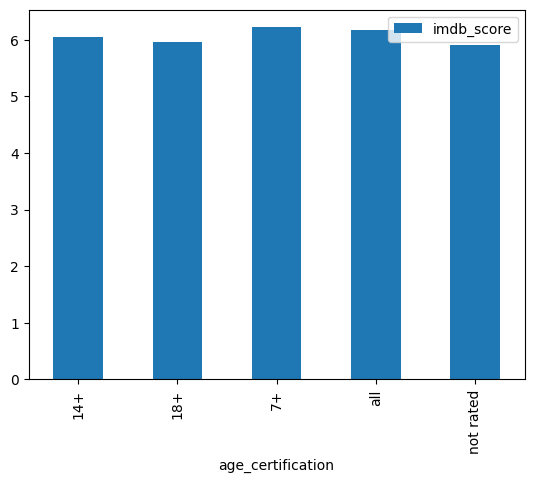

In [ ]:
# plot a istogramma per amazon
amazon_titles_combinata.groupby('age_certification')['imdb_score'].mean().plot(legend=True, kind = 'bar')

<Axes: xlabel='age_certification'>

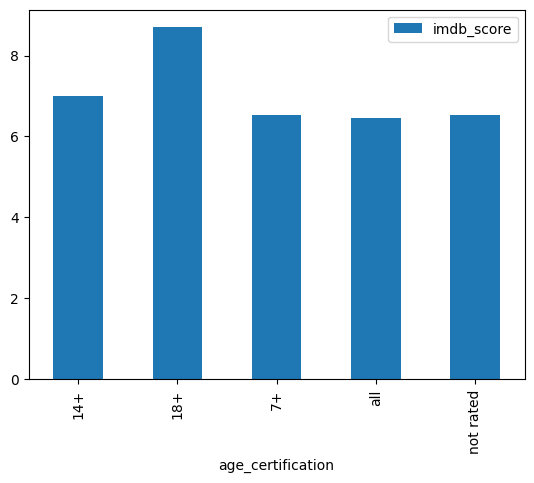

In [ ]:
# plot a istogramma disney
disney_titles_combinata.groupby('age_certification')['imdb_score'].mean().plot(legend=True, kind = 'bar')

### Richiesta 2: Rappresentare il numero di programmi (FILM + TV SHOW) prodotti negli anni.

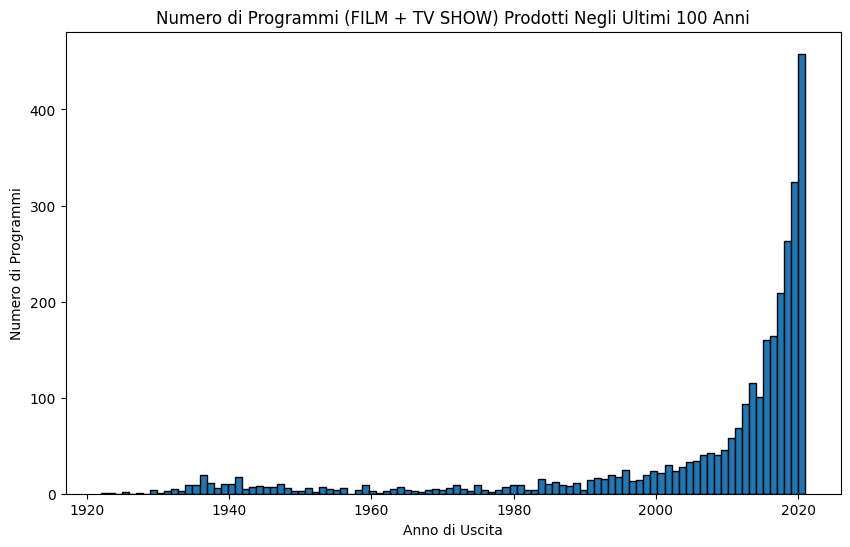

In [ ]:
# filto i dati per includere solo gli ultimi 100 anni
recent_years_amazon = amazon_titles_combinata['release_year'].max() - 100
filtered_data_amazon = amazon_titles_combinata[amazon_titles_combinata['release_year'] >= recent_years_amazon]

# crea un istogramma
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_amazon['release_year'], bins=100, edgecolor='black')
plt.title('Numero di Programmi (FILM + TV SHOW) Prodotti Negli Ultimi 100 Anni')
plt.xlabel('Anno di Uscita')
plt.ylabel('Numero di Programmi')
plt.show()


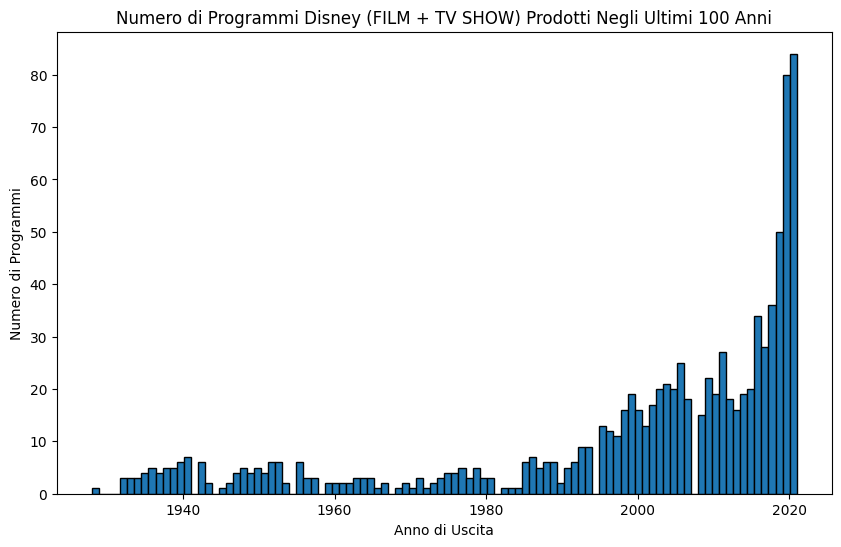

In [ ]:

# filtro i dati per includere solo gli ultimi 100 anni
recent_years_disney = disney_titles_combinata['release_year'].max() - 100
filtered_data_disney = disney_titles_combinata[disney_titles_combinata['release_year'] >= recent_years_disney]

# creo un istogramma
plt.figure(figsize=(10, 6))
plt.hist(filtered_data_disney['release_year'], bins=100, edgecolor='black')
plt.title('Numero di Programmi Disney (FILM + TV SHOW) Prodotti Negli Ultimi 100 Anni')
plt.xlabel('Anno di Uscita')
plt.ylabel('Numero di Programmi')
plt.show()


### Richiesta 3: Rappresentare la stessa informazione rispetto all’anno di caricamento sulla piattaforma.


In [ ]:
amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2924 non-null   object 
 1   title                 2924 non-null   object 
 2   type                  2924 non-null   object 
 3   description           2895 non-null   object 
 4   release_year          2924 non-null   int64  
 5   age_certification     2924 non-null   object 
 6   runtime               2924 non-null   int64  
 7   genres                2924 non-null   object 
 8   production_countries  2924 non-null   object 
 9   seasons               2924 non-null   float64
 10  imdb_id               2716 non-null   object 
 11  imdb_score            2924 non-null   float64
 12  imdb_votes            2924 non-null   float64
 13  tmdb_popularity       2924 non-null   float64
 14  tmdb_score            2924 non-null   float64
 15  date_added           

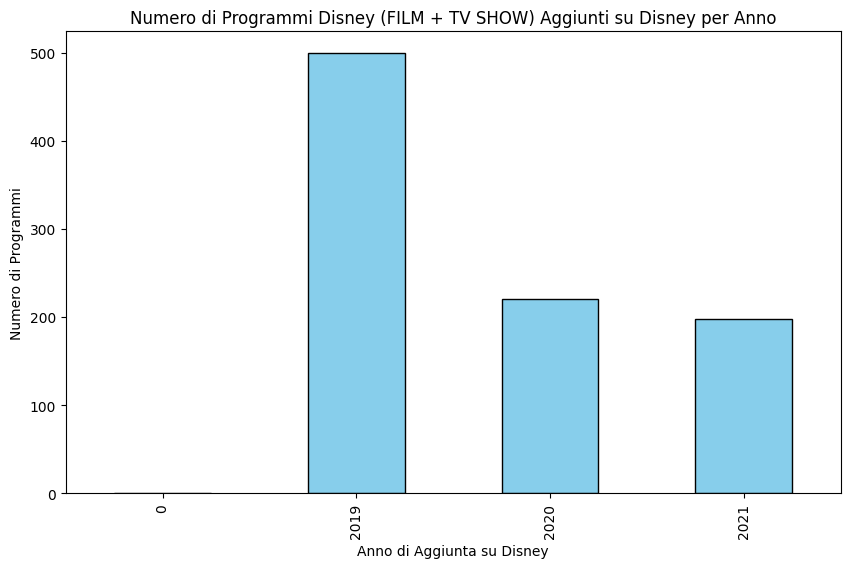

In [ ]:
# Crea un grafico a barre
plt.figure(figsize=(10, 6))
disney_titles_combinata['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Numero di Programmi Disney (FILM + TV SHOW) Aggiunti su Disney per Anno')
plt.xlabel('Anno di Aggiunta su Disney')
plt.ylabel('Numero di Programmi')
plt.show()


# Test statistico

### Richiesta 1: Verificare con un test statistico se ci siano differenze significative tra la distribuzione di FILM suddivisi per anno di produzione o per anno di caricamento sulla piattaforma tenendo separate i dati delle due piattaforme.

In [ ]:
# verifica delle condizioni
# campioni scelti devono avere un numero di elementi n>30
# popolazione N deve essere almeno 10 volte più grande del numero di campioni n, ovvero N>10*n

print(np.sum(disney_titles_combinata['type']=='MOVIE')) #somma tutti i True, ovvero tutti i MOVIE

733


In [ ]:
# scelta livello di significatività
# α=0.05, intervallo di confidenza di 0.95

# H0: non c'è differenza statistica fra la distribuzione dei FILM per anno di rilascio o anno di caricamento
# HA: il contrario, ovvero c'è differenza statistica

# esecuzione t-test: p-value
t,p_value = stats.ttest_ind(disney_titles_combinata[disney_titles_combinata['type']=='MOVIE']['release_year'], disney_titles_combinata[disney_titles_combinata['type']=='MOVIE']['year_added'])

print(t)
print(p_value)

-24.76757418421896
2.1359812569113047e-113


In [ ]:
# p-value << α, rigetto H0 in favore di HA

### Richiesta 2: Verificare con un test statistico se ci siano differenze significative tra la distribuzione di TV SHOW suddivisi per anno di produzione o per anno di caricamento sulla piattaforma tenendo separate i dati delle due piattaforme.

In [ ]:
# verifica delle condizioni
# campioni scelti devono avere un numero di elementi n>30
# popolazione N deve essere almeno 10 volte più grande del numero di campioni n, ovvero N>10*n

print(np.sum(disney_titles_combinata['type']=='SHOW')) #somma tutti i True, ovvero tutti i SHOW

185


In [ ]:
# scelta livello di significatività
# α=0.05, intervallo di confidenza di 0.95

# H0: non c'è differenza statistica fra la distribuzione delle serie per anno di rilascio o anno di caricamento
# HA: il contrario, ovvero c'è differenza statistica

# esecuzione t-test: p-value
t,p_value = stats.ttest_ind(disney_titles_combinata[disney_titles_combinata['type']=='SHOW']['release_year'], disney_titles_combinata[disney_titles_combinata['type']=='SHOW']['year_added'])

print(t)
print(p_value)

0.41436699528881976
0.6788467796012927


In [ ]:
# c'è differenza statistica

### Richiesta 3: eseguire un unico test sull’intero insieme di dati

In [ ]:
# verifica delle condizioni
FILM = np.sum(disney_titles_combinata['type']=='MOVIE')
SERIETV = np.sum(disney_titles_combinata['type']=='SHOW')

print(FILM + SERIETV)

918


In [ ]:
# scelta livello di significatività
# α=0.05, intervallo di confidenza di 0.95

# H0: non c'è differenza statistica fra la distribuzione dei programmi per anno di rilascio o anno di caricamento
# HA: il contrario, ovvero c'è differenza statistica

# esecuzione t-test: p-value
t,p_value = stats.ttest_ind(disney_titles_combinata['release_year'], disney_titles_combinata['year_added'])

print(t)
print(p_value)

-7.502410162039062
9.711164787204332e-14


# OLAP

### Richiesta: Costruire una rappresentazione OLAP che conteggi i dati nelle due piattaforme raggruppando per • age certification, • Tipologia (TV SHOW o FILM), • Paese di produzione. Proporre e discutere 1 visualizzazione.

### Piattaforma Amazon

In [ ]:
amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2924 non-null   object 
 1   title                 2924 non-null   object 
 2   type                  2924 non-null   object 
 3   description           2895 non-null   object 
 4   release_year          2924 non-null   int64  
 5   age_certification     2924 non-null   object 
 6   runtime               2924 non-null   int64  
 7   genres                2924 non-null   object 
 8   production_countries  2924 non-null   object 
 9   seasons               2924 non-null   float64
 10  imdb_id               2716 non-null   object 
 11  imdb_score            2924 non-null   float64
 12  imdb_votes            2924 non-null   float64
 13  tmdb_popularity       2924 non-null   float64
 14  tmdb_score            2924 non-null   float64
 15  date_added           

In [ ]:
# conto il numero di occorrenze di ciascun valore
amazon_titles_combinata['age_certification'].value_counts()

not rated    2013
18+           378
14+           235
7+            201
all            97
Name: age_certification, dtype: int64

In [ ]:
amazon_titles_combinata['type'].value_counts()

MOVIE    2602
SHOW      322
Name: type, dtype: int64

In [ ]:
with pd.option_context('display.max_rows', None,):
  print(amazon_titles_combinata['production_countries'].value_counts())

['US']                                        1423
['IN']                                         614
['GB']                                         208
['CA']                                         109
[]                                              67
['CN']                                          44
['JP']                                          37
['AU']                                          34
['ES']                                          20
['FR']                                          19
['CA', 'US']                                    16
['GB', 'US']                                    16
['IT']                                          15
['US', 'CA']                                    14
['HK']                                          12
['KR']                                          10
['DE']                                           9
['BR']                                           8
['US', 'GB']                                     7
['ZA']                         

In [ ]:
# AGE_CERTIFICATION
# mi assicuro che la colonna 'age_certification' sia di tipo stringa
amazon_titles_combinata['age_certification'] = amazon_titles_combinata['age_certification'].astype('str')

# creo una nuova colonna 'age_certification_quant'
amazon_titles_combinata['age_certification_quant'] = ''

# applico la quantizzazione alla colonna 'age_certification_quant'
amazon_titles_combinata.loc[amazon_titles_combinata['age_certification'] == 'all', 'age_certification_quant'] = 'TUTTI'
amazon_titles_combinata.loc[amazon_titles_combinata['age_certification'].isin(['7+', '14+', '18+']), 'age_certification_quant'] = 'NOT FOR CHILDREN'
amazon_titles_combinata.loc[amazon_titles_combinata['age_certification'] == 'not rated', 'age_certification_quant'] = 'NOT RATED'

# controllo che la colonna sia stata realizzata correttamente
print(amazon_titles_combinata['age_certification_quant'].to_list())


['NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT FOR CHILDREN', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'TUTTI', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'TUTTI', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'TUTTI', 'NO

In [ ]:
quantize_age = ['ALL', 'NOT FOR CHILDREN', 'NOT RATED']

In [ ]:
# TYPE
quantize_type=['MOVIE', 'SHOW']

In [ ]:
# PRODUCTION_COUNTRIES
amazon_titles_combinata['production_countries'] = amazon_titles_combinata['production_countries'].astype('str')

amazon_titles_combinata.loc[amazon_titles_combinata['production_countries'].str.len() < 6,'production_countries_quant'] = 'NO COUNTRY'
amazon_titles_combinata.loc[amazon_titles_combinata['production_countries'].str.len() == 6,'production_countries_quant'] = 'ONE COUNTRY'
amazon_titles_combinata.loc[amazon_titles_combinata['production_countries'].str.len() > 6,'production_countries_quant'] = 'MORE COUNTRIES'

#controllo che la colonna sia stata realizzata correttamente
amazon_titles_combinata['production_countries_quant'].to_list()

['ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE CO

In [ ]:
quantize_country = ['NO COUNTRY', 'ONE COUNTRY', 'MORE COUNTRIES']

In [ ]:
# OLAP
OLAP = np.zeros((len(quantize_country), len(quantize_age), len(quantize_type)))  # aggiorno per utilizzare le dimensioni delle liste di quantizzazione

# riempio il vettore di OLAP con i valori quantizzati
for z in range(len(quantize_type)):
    titles_type = amazon_titles_combinata[amazon_titles_combinata['type'] == quantize_type[z]]
    for j in range(len(quantize_age)):
        for i in range(len(quantize_country)):
            # Sommo, dato che i True valgono 1 e i False valgono 0
            OLAP[i, j, z] = np.sum((titles_type['age_certification_quant'] == quantize_age[j]) &
                                   (titles_type['production_countries_quant'] == quantize_country[i]))

print("Cubo OLAP:")
print(OLAP)


Cubo OLAP:
[[[0.000e+00 0.000e+00]
  [1.000e+00 1.000e+00]
  [5.500e+01 7.000e+00]]

 [[0.000e+00 0.000e+00]
  [5.650e+02 1.210e+02]
  [1.701e+03 1.590e+02]]

 [[0.000e+00 0.000e+00]
  [1.200e+02 6.000e+00]
  [8.700e+01 4.000e+00]]]


### Piattaforma Disney


In [ ]:
disney_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    918 non-null    object 
 1   title                 918 non-null    object 
 2   type                  918 non-null    object 
 3   description           918 non-null    object 
 4   release_year          918 non-null    int64  
 5   age_certification     918 non-null    object 
 6   runtime               918 non-null    int64  
 7   genres                918 non-null    object 
 8   production_countries  918 non-null    object 
 9   seasons               918 non-null    float64
 10  imdb_id               679 non-null    object 
 11  imdb_score            918 non-null    float64
 12  imdb_votes            918 non-null    float64
 13  tmdb_popularity       918 non-null    float64
 14  tmdb_score            918 non-null    float64
 15  country               8

In [ ]:
# conto il numero di occorrenze di ciascun valore
disney_titles_combinata['age_certification'].value_counts()

all          338
7+           317
not rated    196
14+           66
18+            1
Name: age_certification, dtype: int64

In [ ]:
disney_titles_combinata['type'].value_counts()

MOVIE    733
SHOW     185
Name: type, dtype: int64

In [ ]:
with pd.option_context('display.max_rows', None,):
  print(disney_titles_combinata['production_countries'].value_counts())

['US']                            789
['CA', 'US']                       19
['GB']                             16
[]                                 13
['GB', 'US']                       13
['US', 'CA']                        9
['CA']                              5
['US', 'GB']                        5
['AU']                              3
['AU', 'US']                        3
['JP', 'US']                        3
['NZ', 'US']                        2
['US', 'IN']                        2
['IN']                              2
['AR']                              2
['CN']                              2
['DE']                              2
['US', 'DE']                        2
['US', 'AU']                        2
['CZ', 'PL', 'SI', 'US']            1
['US', 'MX']                        1
['US', 'ES']                        1
['NZ', 'US', 'GB']                  1
['SG']                              1
['US', 'KI']                        1
['US', 'AT']                        1
['GB', 'ZA',

In [ ]:
# mi assicuro che la colonna 'age_certification' sia di tipo stringa
disney_titles_combinata['age_certification'] = disney_titles_combinata['age_certification'].astype('str')

# Crea una nuova colonna 'age_certification_quant'
disney_titles_combinata['age_certification_quant'] = ''

# Applica la quantizzazione alla colonna 'age_certification_quant'
disney_titles_combinata.loc[disney_titles_combinata['age_certification'] == 'all', 'age_certification_quant'] = 'ALL'
disney_titles_combinata.loc[disney_titles_combinata['age_certification'].isin(['7+', '14+', '18+']), 'age_certification_quant'] = 'NOT FOR CHILDREN'
disney_titles_combinata.loc[disney_titles_combinata['age_certification'] == 'not rated', 'age_certification_quant'] = 'NOT RATED'

# Controlla che la colonna sia stata realizzata correttamente
print(disney_titles_combinata['age_certification_quant'].to_list())

['ALL', 'ALL', 'NOT RATED', 'ALL', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'ALL', 'NOT RATED', 'ALL', 'NOT RATED', 'ALL', 'NOT RATED', 'ALL', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'ALL', 'NOT RATED', 'ALL', 'ALL', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'ALL', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'NOT RATED', 'ALL', 'NOT RATED', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'NOT RATED', 'ALL', 'ALL', 'ALL', '

In [ ]:
quantize_age = ['ALL', 'NOT FOR CHILDREN', 'NOT RATED']

In [ ]:
# type
quantize_type=['MOVIE', 'SHOW']

In [ ]:
# production_countries
disney_titles_combinata['production_countries'] = disney_titles_combinata['production_countries'].astype('str')

disney_titles_combinata.loc[disney_titles_combinata['production_countries'].str.len() < 6,'production_countries_quant'] = 'NO COUNTRY'
disney_titles_combinata.loc[disney_titles_combinata['production_countries'].str.len() == 6,'production_countries_quant'] = 'ONE COUNTRY'
disney_titles_combinata.loc[disney_titles_combinata['production_countries'].str.len() > 6,'production_countries_quant'] = 'MORE COUNTRIES'

#controllo che la colonna sia stata realizzata correttamente
disney_titles_combinata['production_countries_quant'].to_list()

['ONE COUNTRY',
 'ONE COUNTRY',
 'MORE COUNTRIES',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE COUNTRY',
 'ONE

In [ ]:
quantize_country = ['NO COUNTRY', 'ONE COUNTRY', 'MORE COUNTRIES']

In [ ]:
# OLAP con queste tre colonne quantizzate
OLAP = np.zeros((len(quantize_country), len(quantize_age), len(quantize_type)))  # Aggiornato per utilizzare le dimensioni delle liste di quantizzazione

# Riempio il vettore di OLAP con i valori quantizzati per il set disney_titles_combinata
for z in range(len(quantize_type)):
    titles_type = disney_titles_combinata[disney_titles_combinata['type'] == quantize_type[z]]
    for j in range(len(quantize_age)):
        for i in range(len(quantize_country)):
            # Sommo, dato che i True valgono 1 e i False valgono 0
            OLAP[i, j, z] = np.sum((titles_type['age_certification_quant'] == quantize_age[j]) &
                                   (titles_type['production_countries_quant'] == quantize_country[i]))

# Visualizzazione del risultato
print("Cubo OLAP:")
print(OLAP)

Cubo OLAP:
[[[  1.   0.]
  [  3.   0.]
  [  9.   0.]]

 [[245.  56.]
  [250.  92.]
  [152.  29.]]

 [[ 33.   3.]
  [ 35.   4.]
  [  5.   1.]]]


In [ ]:
# slicing per type
print('SHOW')


OLAP[:,:,1]

SHOW


array([[ 0.,  0.,  0.],
       [56., 92., 29.],
       [ 3.,  4.,  1.]])

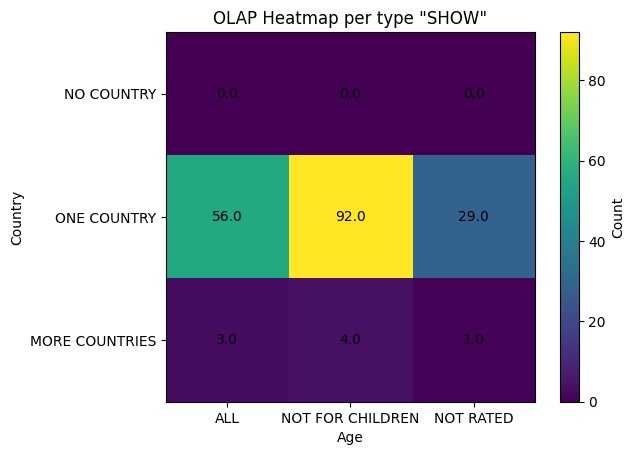

In [ ]:
# Slicing per type "SHOW"
# prendo solo gli SHOW e stampo la matrice
olap_show = OLAP[:, :, 1]

# Visualizzazione della heatmap per type "SHOW"
plt.figure()
plt.imshow(OLAP[:, :, 1])

# Aggiunta di annotazioni per i valori
for i in range(olap_show.shape[0]):
    for j in range(olap_show.shape[1]):
        plt.text(j, i, str(olap_show[i, j]), ha='center', va='center', color='black')

# Aggiunta di etichette e titolo
plt.xticks(range(len(quantize_age)), quantize_age)
plt.yticks(range(len(quantize_country)), quantize_country)
plt.xlabel('Age')
plt.ylabel('Country')
plt.title('OLAP Heatmap per type "SHOW"')

# Visualizzazione della barra laterale
cbar = plt.colorbar()
cbar.set_label('Count')

plt.show()


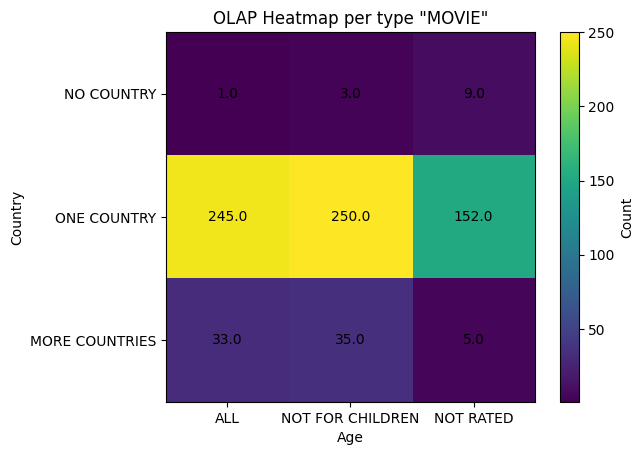

In [ ]:
# Slicing per type "MOVIE"
olap_movie = OLAP[:, :, 0]

# Visualizzazione della heatmap per type "MOVIE"
plt.figure()
plt.imshow(OLAP[:, :, 0])

# Aggiunta di annotazioni per i valori
for i in range(olap_movie.shape[0]):
    for j in range(olap_movie.shape[1]):
        plt.text(j, i, str(olap_movie[i, j]), ha='center', va='center', color='black')

# Aggiunta di etichette e titolo
plt.xticks(range(len(quantize_age)), quantize_age)
plt.yticks(range(len(quantize_country)), quantize_country)
plt.xlabel('Age')
plt.ylabel('Country')
plt.title('OLAP Heatmap per type "MOVIE"')

# Visualizzazione della barra laterale
cbar = plt.colorbar()
cbar.set_label('Count')

plt.show()

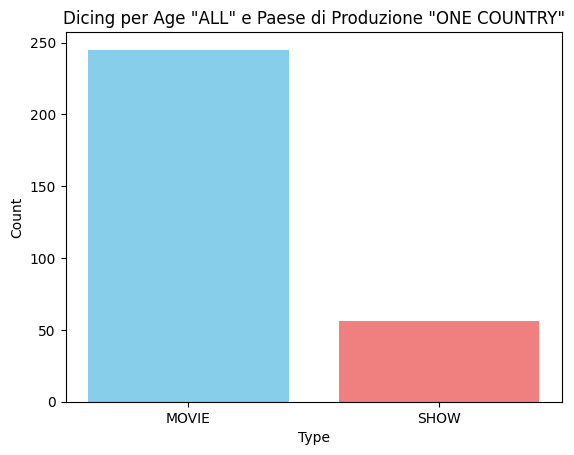

In [ ]:
# Dicing per age "ALL" e paese di produzione "ONE COUNTRY"
diced_data = OLAP[quantize_country.index('ONE COUNTRY'), quantize_age.index('ALL'), :]

# Creazione di un grafico a barre per visualizzare i dati dicing
plt.figure()
plt.bar(quantize_type, diced_data, color=['skyblue', 'lightcoral'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Dicing per Age "ALL" e Paese di Produzione "ONE COUNTRY"')
plt.show()


# Metodi Predittivi

### Richiesta: creare un descrittore composto da • imdb_score, • tmdbs_score, • tmdbs_popularity, • runtime ed utilizzarlo come input per un metodo predittivo supervisionato (es. regressione lineare) per predire type (ossia la categoria che può essere FILM o TV SHOW). Usare come training i dati di una piattaforma, e come test quelli della seconda.

In [ ]:
amazon_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2923
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2924 non-null   object 
 1   title                       2924 non-null   object 
 2   type                        2924 non-null   object 
 3   description                 2895 non-null   object 
 4   release_year                2924 non-null   int64  
 5   age_certification           2924 non-null   object 
 6   runtime                     2924 non-null   int64  
 7   genres                      2924 non-null   object 
 8   production_countries        2924 non-null   object 
 9   seasons                     2924 non-null   float64
 10  imdb_id                     2716 non-null   object 
 11  imdb_score                  2924 non-null   float64
 12  imdb_votes                  2924 non-null   float64
 13  tmdb_popularity             2924 

In [ ]:
disney_titles_combinata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          918 non-null    object 
 1   title                       918 non-null    object 
 2   type                        918 non-null    object 
 3   description                 918 non-null    object 
 4   release_year                918 non-null    int64  
 5   age_certification           918 non-null    object 
 6   runtime                     918 non-null    int64  
 7   genres                      918 non-null    object 
 8   production_countries        918 non-null    object 
 9   seasons                     918 non-null    float64
 10  imdb_id                     679 non-null    object 
 11  imdb_score                  918 non-null    float64
 12  imdb_votes                  918 non-null    float64
 13  tmdb_popularity             918 non

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# training set
X_train = amazon_titles_combinata[["imdb_score", "tmdb_score", "tmdb_popularity", "runtime"]].copy()
y_train = amazon_titles_combinata['type']
print(X_train)

      imdb_score  tmdb_score  tmdb_popularity  runtime
0       7.800000    7.400000        12.582000       92
1       7.600000    7.100000        12.131000      105
2       7.900000    7.559000         8.585000      115
3       8.000000    7.560000        11.167000       95
4       7.800000    7.200000         6.756000      101
...          ...         ...              ...      ...
2919    5.957546    6.012227         5.006315       17
2920    6.400000    6.012227         5.006315       76
2921    9.100000    6.012227         5.006315      127
2922    8.200000    6.012227         5.006315       20
2923    9.200000    6.012227         5.006315       24

[2924 rows x 4 columns]


In [ ]:
# validation set
X_valid = disney_titles_combinata[["imdb_score", "tmdb_score", "tmdb_popularity", "runtime"]].copy()
y_valid = disney_titles_combinata['type']
print(X_valid)

     imdb_score  tmdb_score  tmdb_popularity  runtime
0      7.300000    7.037000          116.704       74
1      7.300000    7.007000           62.168       70
2      6.900000    6.600000           10.393       96
3      7.500000    7.105000           70.919       88
4      6.536186    6.800000            6.135        8
..          ...         ...              ...      ...
913    6.100000    6.500000            1.848       41
914    6.100000   10.000000            1.699       42
915    7.500000    5.667000            1.503       46
916    9.100000    6.806803            1.065       44
917    8.100000    6.806803            0.913       43

[918 rows x 4 columns]


In [ ]:
# Normalizzazione delle colonne nel set di addestramento
X_train['tmdb_popularity'] = (X_train['tmdb_popularity'] - X_train['tmdb_popularity'].min()) / (X_train['tmdb_popularity'].max() - X_train['tmdb_popularity'].min())
X_train['runtime'] = (X_train['runtime'] - X_train['runtime'].min()) / (X_train['runtime'].max() - X_train['runtime'].min())
X_train['imdb_score'] = (X_train['imdb_score'] - X_train['imdb_score'].min()) / (X_train['imdb_score'].max() - X_train['imdb_score'].min())
X_train['tmdb_score'] = (X_train['tmdb_score'] - X_train['tmdb_score'].min()) / (X_train['tmdb_score'].max() - X_train['tmdb_score'].min())
print(X_train)

      imdb_score  tmdb_score  tmdb_popularity   runtime
0       0.827160    0.711111         0.068692  0.280488
1       0.802469    0.677778         0.066229  0.320122
2       0.839506    0.728778         0.046865  0.350610
3       0.851852    0.728889         0.060965  0.289634
4       0.827160    0.688889         0.036878  0.307927
...          ...         ...              ...       ...
2919    0.599697    0.556914         0.027323  0.051829
2920    0.654321    0.556914         0.027323  0.231707
2921    0.987654    0.556914         0.027323  0.387195
2922    0.876543    0.556914         0.027323  0.060976
2923    1.000000    0.556914         0.027323  0.073171

[2924 rows x 4 columns]


In [ ]:
# Normalizzazione delle colonne nel set di test
X_valid['tmdb_popularity'] = (X_valid['tmdb_popularity'] - X_valid['tmdb_popularity'].min()) / (X_valid['tmdb_popularity'].max() - X_valid['tmdb_popularity'].min())
X_valid['runtime'] = (X_valid['runtime'] - X_valid['runtime'].min()) / (X_valid['runtime'].max() - X_valid['runtime'].min())
X_valid['imdb_score'] = (X_valid['imdb_score'] - X_valid['imdb_score'].min()) / (X_valid['imdb_score'].max() - X_valid['imdb_score'].min())
X_valid['tmdb_score'] = (X_valid['tmdb_score'] - X_valid['tmdb_score'].min()) / (X_valid['tmdb_score'].max() - X_valid['tmdb_score'].min())
print(X_valid)

     imdb_score  tmdb_score  tmdb_popularity   runtime
0      0.760000    0.629625         0.102050  0.403315
1      0.760000    0.625875         0.054115  0.381215
2      0.706667    0.575000         0.008608  0.524862
3      0.786667    0.638125         0.061807  0.480663
4      0.658158    0.600000         0.004865  0.038674
..          ...         ...              ...       ...
913    0.600000    0.562500         0.001097  0.220994
914    0.600000    1.000000         0.000966  0.226519
915    0.786667    0.458375         0.000794  0.248619
916    1.000000    0.600850         0.000409  0.237569
917    0.866667    0.600850         0.000275  0.232044

[918 rows x 4 columns]


In [ ]:
# istanza dell'oggetto della classe LogisticRegression
log_reg = LogisticRegression()

# fit sul training set
log_reg.fit(X_train, y_train)
y_hat_train = log_reg.predict(X_train)

print(log_reg.score(X_train, y_train))

0.9425444596443229


In [ ]:
y_hat_valid = log_reg.predict(X_valid)

print(log_reg.score(X_valid, y_valid))

0.710239651416122


In [ ]:
# controllo modello nullo
print(np.sum(disney_titles_combinata['type'] == 'MOVIE')/disney_titles_combinata['type'].shape[0])

0.7984749455337691


In [ ]:
print(np.sum(disney_titles_combinata['type'] == 'SHOW')/disney_titles_combinata['type'].shape[0])

0.20152505446623092
